In [ ]:
# https://keraskorea.github.io/posts/2018-10-24-little_data_powerful_model/

In [ ]:
import os
import numpy as np
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bananapple","key":"75eb3c0872d58bbdaf9df31824376852"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gmlmrinalini/manwomandetection

 92% 126M/138M [00:02<00:00, 51.3MB/s]
100% 138M/138M [00:02<00:00, 51.0MB/s]


In [ ]:
#압축풀기
import zipfile

local_zip = '/content/manwomandetection.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()

# directory 지정하기 

In [ ]:
#기본 경로지정

base_dir='/content/dataset'

train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'test')

In [ ]:
#훈련에 사용되는 이미지 경로
train_man_dir=os.path.join(train_dir,'man')
train_woman_dir=os.path.join(train_dir,'woman')

#test 이미지 경로
test_man_dir=os.path.join(test_dir,'man')
test_woman_dir=os.path.join(test_dir,'woman')

In [ ]:
#이미지 파일들을 리스트에 담기
train_man_fnames=os.listdir(train_man_dir)
train_woman_fnames=os.listdir(train_woman_dir)

print(train_woman_fnames[:5])

test_man_fnames=os.listdir(test_man_dir)
test_woman_fnames=os.listdir(test_woman_dir)

print(test_woman_fnames[:5])


['face_426.jpg', 'face_1091.jpg', 'face_1318.jpg', 'face_1001.jpg', 'face_446.jpg']
['face_167.jpg', 'face_2.jpg', 'face_19.jpg', 'face_98.jpg', 'face_116.jpg']


In [ ]:
#각 리스트에 파일이 몇개 담겨있는지 확인하기
print('train man {}'.format(len(train_man_fnames)))
print('train woman {}'.format(len(train_woman_fnames)))
#test
print('train man {}'.format(len(test_man_fnames)))
print('train woman {}'.format(len(test_woman_fnames)))

train man 821
train woman 794
train man 176
train woman 170


# 데이터셋/ 전처리

In [ ]:
bacth=30
img_height=150
img_width=150

In [ ]:
#데이터 증강
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=30,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest'
                                )

test_datagen=ImageDataGenerator(rescale=1./255,
                                )


batch_list=[20,32,48,64]
train_gen_list=[]
test_gen_list=[]

for batch_ in batch_list:
  train_generator=train_datagen.flow_from_directory(train_dir,
                                                    batch_size=batch_,
                                                    class_mode='binary',
                                                    target_size=(img_height,img_width)
                                                    )
  train_gen_list.append(train_generator)
  test_generator=test_datagen.flow_from_directory(test_dir,
                                                  batch_size=batch_,
                                                  class_mode='binary',
                                                  target_size=(img_height,img_width)
                                                  )
  test_gen_list.append(test_generator)

Found 1615 images belonging to 2 classes.
Found 346 images belonging to 2 classes.
Found 1615 images belonging to 2 classes.
Found 346 images belonging to 2 classes.
Found 1615 images belonging to 2 classes.
Found 346 images belonging to 2 classes.
Found 1615 images belonging to 2 classes.
Found 346 images belonging to 2 classes.


# 모델링

In [ ]:
import tensorflow as tf

tf.__version__

from tensorflow.keras import datasets, layers, models
from keras.preprocessing import image
from keras.engine.sequential import Sequential
from tensorflow import keras
from keras import regularizers

In [ ]:
kernel_s=(3,3)
model=keras.models.Sequential()

model.add(layers.Conv2D(16,kernel_s,activation='relu',input_shape=(img_height,img_width,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

# 학습하기

In [ ]:
history=model.fit(train_gen_list[2],
                  epochs=50,
                  validation_data=test_gen_list[2],
                  steps_per_epoch=20                 
                  )

#모델 저장하기
from keras.models import load_model
model.save('first_try.h5')

Epoch 1/50
20/20 [==============================] - 7s 372ms/step - loss: 0.5209 - accuracy: 0.7593 - val_loss: 0.3466 - val_accuracy: 0.8699
Epoch 2/50
20/20 [==============================] - 7s 367ms/step - loss: 0.4754 - accuracy: 0.7760 - val_loss: 0.3504 - val_accuracy: 0.8844
Epoch 3/50
20/20 [==============================] - 7s 367ms/step - loss: 0.4682 - accuracy: 0.7698 - val_loss: 0.3291 - val_accuracy: 0.8786
Epoch 4/50
20/20 [==============================] - 7s 357ms/step - loss: 0.4386 - accuracy: 0.8006 - val_loss: 0.4148 - val_accuracy: 0.8266
Epoch 5/50
20/20 [==============================] - 7s 366ms/step - loss: 0.4375 - accuracy: 0.7996 - val_loss: 0.3459 - val_accuracy: 0.8468
Epoch 6/50
20/20 [==============================] - 9s 435ms/step - loss: 0.4394 - accuracy: 0.7906 - val_loss: 0.5742 - val_accuracy: 0.7746
Epoch 7/50
20/20 [==============================] - 7s 371ms/step - loss: 0.4528 - accuracy: 0.8021 - val_loss: 0.3617 - val_accuracy: 0.8382
Epoch 

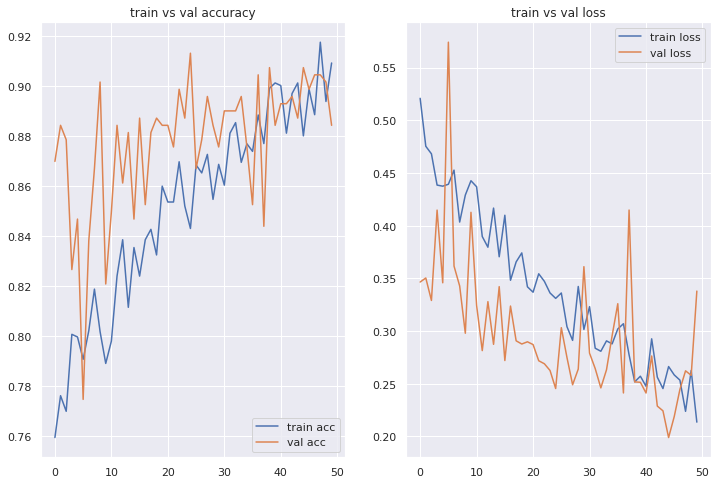

In [ ]:
#정확도
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

#오차 확인
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(50)

#accuracy 확인
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='train acc')
plt.plot(epochs_range,val_acc,label='val acc')
plt.legend(loc='lower right')
plt.title('train vs val accuracy')

#오차 확인
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='train loss')
plt.plot(epochs_range,val_loss,label='val loss')
plt.legend()
plt.title('train vs val loss')

plt.show()

In [ ]:
#evaluate()는 정확도를 볼수 있는 함수
test_loss, test_acc = model.evaluate(test_gen_list[2],verbose=2)#verbose는 그냥 출력문을 어떤식으로 보여줄까 묻는거 0은 출력문 안보여줌 1은 반만 2는 전체 다 출력

print('\n테스트 정확도:', test_acc)
print('\n테스트 손실값"',test_loss)

8/8 - 2s - loss: 0.3380 - accuracy: 0.8844 - 2s/epoch - 198ms/step

테스트 정확도: 0.884393036365509

테스트 손실값" 0.3379775583744049


In [ ]:
#모델 불러오기
from keras.models import load_model
model2 = load_model('/content/man or woman epoch 50.h5')


test_loss, test_acc = model2.evaluate(test_gen_list[1],verbose=2)#verbose는 그냥 출력문을 어떤식으로 보여줄까 묻는거 0은 출력문 안보여줌 1은 반만 2는 전체 다 출력

print('\n테스트 정확도:', test_acc)
print('\n테스트 손실값"',test_loss)

11/11 - 12s - loss: 0.3413 - accuracy: 0.8786 - 12s/epoch - 1s/step

테스트 정확도: 0.8786126971244812

테스트 손실값" 0.3412811756134033


In [ ]:
model=model2

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

# 테스트 이미지 분류해보기

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

Saving 톰크루즈.jfif to 톰크루즈.jfif


In [ ]:
#방법1
for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(img_height, img_width))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a woman")# 1. 0. 남자
  else:
    print(fn + " is a man")#0. 1. 여자

[0.]
톰크루즈.jfif is a man


In [ ]:
#방법2
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import cv2

def pred_img(img):
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

  img_resized=cv2.resize(img,(img_height,img_width))#모델에 들어가는 이미지 크기가 224*224 이기때문에 224*244로 이미지 크기를 조정해줌
  pred=model.predict(img_resized.reshape([1,img_height,img_width,3]))#예측을 할건데 모델.predict(위에서 이미지 크기를 조정한 이미지를 넣고 reshape()로 재배치를 시킨 값을 넣는다.)
  print(pred[0])

  if(pred[0]>0.5):
    print('woman')
  else:
    print('man')

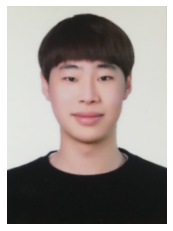

[1.]
woman


In [ ]:
img = cv2.imread("/content/증명사진.jpg")
pred_img(img)

In [ ]:
#방법2.1
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import cv2

def pred_img2(img,i):
  plt.subplot(4,4,i+1)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  
  plt.axis('off')
  plt.show()

  img_resized=cv2.resize(img,(img_height,img_width))#모델에 들어가는 이미지 크기가 224*224 이기때문에 224*244로 이미지 크기를 조정해줌
  pred=model.predict(img_resized.reshape([1,img_height,img_width,3]))#예측을 할건데 모델.predict(위에서 이미지 크기를 조정한 이미지를 넣고 reshape()로 재배치를 시킨 값을 넣는다.)
  print(pred[0])

  if(pred[0]>0.5):
    print('woman')
  else:
    print('man')

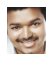

[0.]
man


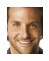

[0.]
man


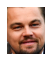

[6.699531e-17]
man


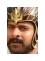

[0.]
man


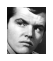

[0.]
man


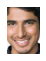

[0.]
man


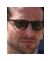

[0.]
man


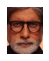

[0.]
man


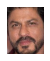

[7.2732475e-16]
man


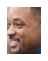

[1.]
woman


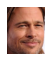

[0.0002926]
man


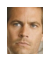

[0.]
man


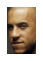

[1.]
woman


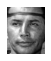

[0.]
man


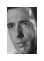

[0.]
man


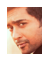

[0.]
man


In [ ]:
img=[]
for name in train_man_fnames[:16]:
  img_data=cv2.imread(train_man_dir+'/'+name)
  img.append(img_data)
for j,data in enumerate(img):
  pred_img2(data,j)

# opencv 테스트 이미지 전처리

In [ ]:
import cv2
src=cv2.imread('/content/증명사진.jpg',cv2.IMREAD_UNCHANGED)

In [ ]:
src.shape

(1280, 938, 3)

(-0.5, 408.5, 487.5, -0.5)

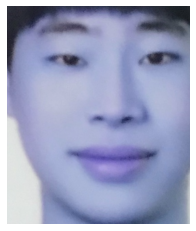

In [ ]:
#이미지 자르기 자를때는 그림판으로 픽셀값 확인하기

# https://wjh2307.tistory.com/7 여기 사이트 참고

dst=src[308:796,236:645].copy()

plt.imshow(dst)
plt.axis('off')

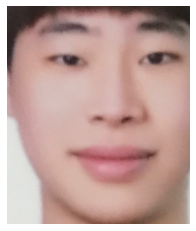

[0.]
man


In [ ]:
pred_img(dst)